In [58]:
# build graph pool with the following structure 
# graph_pool = {'graphs': {gid: { 
#                          'nodes': {nodeid: 'label'},
#                          'edges': [{'source': -1, 'target': -1}]}}}
import pandas as pd
import json
import os
import sys
import glob
import graph_tool.all as gt
from datetime import datetime

In [103]:
file = '/home/maniaa/ashes/code/dags.csv'
df1 = pd.read_csv(file)
min_ts = df['submitTime'].min()
df1['submitTs'] = (df1['submitTime'] - min_ts)//(3600*1000)

In [108]:
df = df1[df1['submitTs'] < 24]
df.reset_index(inplace=True)

dt = datetime.fromtimestamp((df['submitTime']//1000).values[0]).date()
df2 = pd.read_csv('/home/maniaa/ashes/code/statistics/' + dt.strftime('%m-%d-%Y') + '.csv')

In [141]:
def build_graph(gstr):
    wrk_edges = [e.split('>') for e in gstr.split(',')]
    lbl_vid = {}
    graph = {'nodes': {}, 'edges': []}
    g = gt.Graph(directed=True)
    v_lbl = g.new_vertex_property("int")
    for e in wrk_edges:
        srclbl = int(e[0].split('-')[1])
        if srclbl not in lbl_vid:
            vsrc = g.add_vertex()
            v_lbl[vsrc] = srclbl
            lbl_vid[srclbl] = int(vsrc)
            
        if len(e) > 1:
            trgtlbl = int(e[1].split('-')[1])
            if trgtlbl not in lbl_vid:
                vtgt = g.add_vertex()
                v_lbl[vtgt] = trgtlbl
                lbl_vid[trgtlbl] = int(vtgt)
            g.add_edge(lbl_vid[srclbl], lbl_vid[trgtlbl])
   
    g.vertex_properties['label'] = v_lbl
    
    if index != -1:
        gt.graph_draw(g, vertex_text=g.vp.label, vertex_font_size=18,
                      output_size=(200, 200))
    print(wrk_edges)
    return g
    
for index, row in df.iterrows():
    print('..............................\n', row['workflow.id'])
    dt = datetime.fromtimestamp(row['submitTime']//1000).date()
    cdag_jobs = df2[df2['workflow.id'] == row['workflow.id']]
    
    print(' input sz', cdag_jobs.HDFS_INPUT_SIZE.values, '\n', 
          'output sz', cdag_jobs.HDFS_OUTPUT_SIZE.values, '\n', 
          'stages', cdag_jobs['workflow.node'].values, '\n', 
          'run time', cdag_jobs.runTime.values, '\n', 
          '# inputs', cdag_jobs.n_inputs.values,'\n',
          '# query', cdag_jobs..values,'\n')
    build_graph(row['dag'])
    
    if index == 20:
        break

..............................
 hive_anki_20180802080808_85b26ede-f569-4b50-bc0e-4a1c30121066


AttributeError: 'function' object has no attribute 'values'

In [112]:
print(df2['user.name'].value_counts())

netappiq    7855
asupdl      1827
saia        1174
gkasha       559
mphani        93
madav         73
rameshpb      71
anki          67
kavithad      54
wilp          51
etlhive       40
nishant2      29
asonali       28
romag         26
rnaik         26
nibu          22
crajesh       21
vinayn        19
carchi        17
boost         16
akshatab      14
lianghui      14
benl          13
chaitraj      13
uppuluri      12
somenath      11
asupprod       9
ranganat       9
lakshmah       8
mamtap         8
rebeccak       7
badrinan       7
saieshwa       5
shyampra       4
swarupm        4
patanar        3
shalinip       3
andrewv        2
hive           2
kumarswr       2
root           1
vindhyas       1
shubhvar       1
Name: user.name, dtype: int64


In [125]:
print('Output size', df2[df2['user.name'] == 'netappiq']['HDFS_OUTPUT_SIZE'].std(), 
      df2[df2['user.name'] == 'netappiq']['HDFS_OUTPUT_SIZE'].max(),
     df2[df2['user.name'] == 'netappiq']['HDFS_OUTPUT_SIZE'].min())

print('Input size', df2[df2['user.name'] == 'netappiq']['HDFS_INPUT_SIZE'].std(), 
      df2[df2['user.name'] == 'netappiq']['HDFS_INPUT_SIZE'].max(),
     df2[df2['user.name'] == 'netappiq']['HDFS_INPUT_SIZE'].min())

print('Runtime', df2[df2['user.name'] == 'netappiq']['runTime'].std(), 
      df2[df2['user.name'] == 'netappiq']['runTime'].max(),
     df2[df2['user.name'] == 'netappiq']['runTime'].min())

print(df2[df2['user.name'] == 'netappiq'][['n_inputs', 'HDFS_INPUT_SIZE', 'HDFS_OUTPUT_SIZE', 'runTime']])

pd.set_option('display.max_rows', 130)
print(df2[df2['user.name'] == 'netappiq']['HDFS_OUTPUT_SIZE'].value_counts())

Output size 30363437666.74318 1646935469021 2
Input size 1103362651885.2751 39950413013211 11626
Runtime 218982.36308206597 7882698 8718
       n_inputs  HDFS_INPUT_SIZE  HDFS_OUTPUT_SIZE  runTime
1             1         19695698                17    24131
2             1         19695698                17    21597
3             1         19695698                17    25634
6             1         43231231                17    15160
7             1         19695698                17    26722
...         ...              ...               ...      ...
12212         1            11647                 2    19636
12214         1         74981601                17    19772
12216         1         74981596                17    20984
12218         1         56802507                17    18629
12220         1         19695698                17    14118

[7855 rows x 4 columns]
17               6942
3                 454
2                 332
11                  6
16079445341         2
14277940

/home/maniaa/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


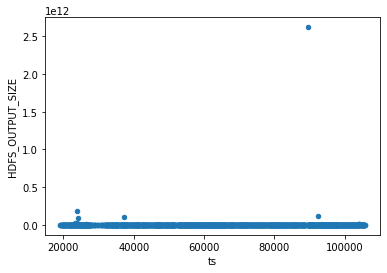

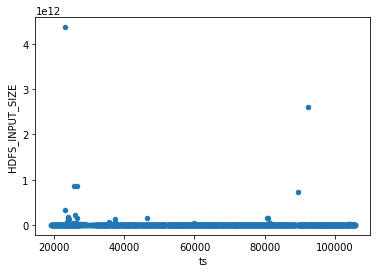

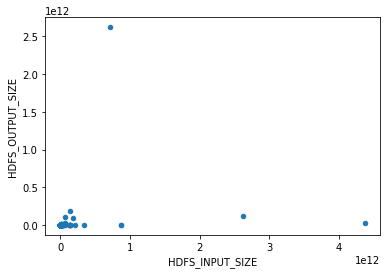

In [140]:
import matplotlib.pyplot as plt
df3 = df2[df2['user.name'] == 'asupdl']
df3['ts'] = (df2['submitTime'] - df2['submitTime'].min())//(1000)
df3.plot.scatter(x = 'ts', y = 'HDFS_OUTPUT_SIZE')
plt.show()

df3.plot.scatter(x = 'ts', y = 'HDFS_INPUT_SIZE')
plt.show()

df3.plot.scatter(x = 'HDFS_INPUT_SIZE', y = 'HDFS_OUTPUT_SIZE')
plt.show()